In [1]:
import pandas as pd
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 各データの変換

### race_data

In [2]:
df_race = pd.read_csv('race_data.csv')
df_race

,race_id,date,place,track,length,direction,weather,condition,rank,horse_num,horse_id,jockey_id,popularity,weight
0,202002020410,2020-07-12,函館,芝,2600,右,曇,良,1,6,2017101695,1015,10.0,NaN
1,202002020410,2020-07-12,函館,芝,2600,右,曇,良,2,8,2015100243,1091,4.0,NaN
2,202002020410,2020-07-12,函館,芝,2600,右,曇,良,3,11,2016101207,5203,5.0,NaN
3,202002020410,2020-07-12,函館,芝,2600,右,曇,良,4,13,2016104887,1032,2.0,NaN
4,202002020410,2020-07-12,函館,芝,2600,右,曇,良,5,9,2016103294,1127,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44171,201508010111,2015-01-04,京都,芝,1600,右,晴,良,14,10,2006103340,1126,16.0,NaN
44172,201508010111,2015-01-04,京都,芝,1600,右,晴,良,15,17,2011100693,1018,8.0,NaN
44173,201508010111,2015-01-04,京都,芝,1600,右,晴,良,16,14,2008106438,1144,17.0,NaN
44174,201508010111,2015-01-04,京都,芝,1600,右,晴,良,17,18,2011104231,894,9.0,NaN


#### 欠損値補完

In [3]:
# 欠損値、誤り補完
df_race['length'] = df_race['length'].replace(2, 3600)
df_race['weather'] = df_race['weather'].fillna('雪')
df_race['popularity'] = df_race['popularity'].fillna(0)
df_race = df_race.fillna(0)
df_race.head()

,race_id,date,place,track,length,direction,weather,condition,rank,horse_num,horse_id,jockey_id,popularity,weight
0,202002020410,2020-07-12,函館,芝,2600,右,曇,良,1,6,2017101695,1015,10.0,0.0
1,202002020410,2020-07-12,函館,芝,2600,右,曇,良,2,8,2015100243,1091,4.0,0.0
2,202002020410,2020-07-12,函館,芝,2600,右,曇,良,3,11,2016101207,5203,5.0,0.0
3,202002020410,2020-07-12,函館,芝,2600,右,曇,良,4,13,2016104887,1032,2.0,0.0
4,202002020410,2020-07-12,函館,芝,2600,右,曇,良,5,9,2016103294,1127,3.0,0.0


#### 型変換

In [4]:
# date : datetime
df_race['date'] = pd.to_datetime(df_race['date'])

df_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44176 entries, 0 to 44175
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   race_id     44176 non-null  int64         
 1   date        44176 non-null  datetime64[ns]
 2   place       44176 non-null  object        
 3   track       44176 non-null  object        
 4   length      44176 non-null  int64         
 5   direction   44176 non-null  object        
 6   weather     44176 non-null  object        
 7   condition   44176 non-null  object        
 8   rank        44176 non-null  object        
 9   horse_num   44176 non-null  int64         
 10  horse_id    44176 non-null  int64         
 11  jockey_id   44176 non-null  int64         
 12  popularity  44176 non-null  float64       
 13  weight      44176 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(6)
memory usage: 4.7+ MB


#### エンコーディング

In [5]:
# categorical data : encoding
conv_place = {
    '札幌' : 0,
    '函館' : 1,
    '福島' : 2,
    '新潟' : 3,
    '東京' : 4,
    '中山' : 5,
    '中京' : 6,
    '京都' : 7,
    '阪神' : 8,
    '小倉' : 9
}
df_race['place'] = df_race['place'].map(conv_place)

conv_track = {
    '芝' : 0,
    'ダ' : 1
}
df_race['track'] = df_race['track'].map(conv_track)

conv_direction = {
    '直' : 0,
    '右' : 1,
    '左' : 2
}
df_race['direction'] = df_race['direction'].map(conv_direction)

conv_weather = {
    '晴' : 0,
    '曇' : 1,
    '小雨' : 2,
    '雨' : 3,
    '小雪' : 2,
    '雪' : 3
}
df_race['weather'] = df_race['weather'].map(conv_weather)

conv_condition = {
    '良' : 0,
    '稍重' : 1,
    '重' : 2,
    '不良' : 3
}
df_race['condition'] = df_race['condition'].map(conv_condition)

def conv_rank(x):
    if '降' in str(x):
        return x[0]
    if str(x) in ['除', '取', '中']:
        return '19'
    return x
# 型変換
for col in ['rank', 'horse_num', 'horse_id', 'jockey_id', 'popularity']:
    if col == 'rank':
        df_race[col] = df_race[col].map(conv_rank)
    df_race[col] = df_race[col].astype('int')

df_race.head()

,race_id,date,place,track,length,direction,weather,condition,rank,horse_num,horse_id,jockey_id,popularity,weight
0,202002020410,2020-07-12,1,0,2600,1,1,0,1,6,2017101695,1015,10,0.0
1,202002020410,2020-07-12,1,0,2600,1,1,0,2,8,2015100243,1091,4,0.0
2,202002020410,2020-07-12,1,0,2600,1,1,0,3,11,2016101207,5203,5,0.0
3,202002020410,2020-07-12,1,0,2600,1,1,0,4,13,2016104887,1032,2,0.0
4,202002020410,2020-07-12,1,0,2600,1,1,0,5,9,2016103294,1127,3,0.0


### horse_data

In [6]:
df_horse = pd.read_csv('horse_data.csv')
df_horse.head()

,horse_id,sex,birthday,trainer,prize_center,prize_region,attr_course,attr_length,attr_leg,attr_growth,attr_condition,f_res_1st,f_res_2nd,f_res_3rd,f_res_lose,mf_res_1st,mf_res_2nd,mf_res_3rd,mf_res_lose,weight
0,2014101505,牝,2014年4月12日,01084,7352,0,116,58,116,29,96,4,4,0,4,6,4,4,13,"202009030411,504:202004010311,498:202003010512..."
1,2010103814,牝,2010年3月4日,01145,535,0,116,96,69,46,66,0,0,0,0,0,0,0,0,"201507040302,448:201504030309,458:201504021006..."
2,2007105543,牡,2007年3月22日,00438,31244,1200,95,111,64,65,69,11,2,1,7,0,0,0,0,"201506020311,538:201404030811,536:201409040211..."
3,2010103823,牝,2010年3月23日,01048,7631,12528,72,58,87,77,116,8,1,5,2,0,0,0,0,"201643120711,482:201645110309,486:201605040311..."
4,2010103832,牡,2010年4月27日,01018,4144,0,81,112,67,30,112,11,2,1,7,0,0,0,1,"201508030408,516:201503010111,512:201403030512..."


In [7]:
df_horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8194 entries, 0 to 8193
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   horse_id        8194 non-null   int64 
 1   sex             8189 non-null   object
 2   birthday        8194 non-null   object
 3   trainer         8194 non-null   object
 4   prize_center    8194 non-null   int64 
 5   prize_region    8194 non-null   int64 
 6   attr_course     8194 non-null   int64 
 7   attr_length     8194 non-null   int64 
 8   attr_leg        8194 non-null   int64 
 9   attr_growth     8194 non-null   int64 
 10  attr_condition  8194 non-null   int64 
 11  f_res_1st       8194 non-null   int64 
 12  f_res_2nd       8194 non-null   int64 
 13  f_res_3rd       8194 non-null   int64 
 14  f_res_lose      8194 non-null   int64 
 15  mf_res_1st      8194 non-null   int64 
 16  mf_res_2nd      8194 non-null   int64 
 17  mf_res_3rd      8194 non-null   int64 
 18  mf_res_l

#### 型変換

In [8]:
# 型変換
df_horse['horse_id'] = df_horse['horse_id'].astype('int')
df_horse['birthday'] = pd.to_datetime(df_horse['birthday'], format='%Y年%m月%d日')

#### 欠損値補完

In [9]:
# 欠損値補完
# 性別データはここから取得 -> https://ahonoora.com/
df_horse.loc[df_horse['horse_id'] == 2012190001, 'sex'] = '牡'
df_horse.loc[df_horse['horse_id'] == 2008190008, 'sex'] = 'セ'
df_horse.loc[df_horse['horse_id'] == 2012190002, 'sex'] = '牝'
df_horse.loc[df_horse['horse_id'] == 2011190001, 'sex'] = 'セ'
df_horse.loc[df_horse['horse_id'] == 2011190002, 'sex'] = '牡'
df_horse.isnull().sum()

horse_id          0
sex               0
birthday          0
trainer           0
prize_center      0
prize_region      0
attr_course       0
attr_length       0
attr_leg          0
attr_growth       0
attr_condition    0
f_res_1st         0
f_res_2nd         0
f_res_3rd         0
f_res_lose        0
mf_res_1st        0
mf_res_2nd        0
mf_res_3rd        0
mf_res_lose       0
weight            0
dtype: int64

#### エンコーディング

In [10]:
# sex : encoding
sex_condition = {
    '牡' : 0,
    '牝' : 1,
    'セ' : 2
}
df_horse['sex'] = df_horse['sex'].map(sex_condition)

# trainer : 16進数扱いし10進数化
df_horse['trainer'] = df_horse['trainer'].map(lambda x: int(x, 16))

# 適性をパーセンテージに変換
df_horse['attr_course'] = (df_horse['attr_course'] / 116).astype(np.float16)
df_horse['attr_length'] = (df_horse['attr_length'] / 116).astype(np.float16)
df_horse['attr_leg'] = (df_horse['attr_leg'] / 116).astype(np.float16)
df_horse['attr_growth'] = (df_horse['attr_growth'] / 116).astype(np.float16)
df_horse['attr_condition'] = (df_horse['attr_condition'] / 116).astype(np.float16)

### jockey_data

In [11]:
df_jockey = pd.read_csv('jockey_data.csv')
df_jockey.head()

,jockey_id,weight,birthday
0,1015,50.0,1977/09/26
1,1091,47.0,1985/11/05
2,5203,50.0,1974/03/12
3,1032,45.0,1979/07/23
4,1127,47.0,1990/10/03


In [12]:
df_jockey.isnull().sum()

jockey_id      0
weight       113
birthday       0
dtype: int64

#### 欠損値補完

In [13]:
# 大体平均値で補完
df_jockey['weight'] = df_jockey['weight'].fillna(48)

#### 型変換

In [14]:
df_jockey['jockey_id'] = df_jockey['jockey_id'].astype('int')
df_jockey['weight'] = df_jockey['weight'].astype('int')
df_jockey['birthday'] = pd.to_datetime(df_jockey['birthday'], format='%Y/%m/%d')

df_jockey.head()

,jockey_id,weight,birthday
0,1015,50,1977-09-26
1,1091,47,1985-11-05
2,5203,50,1974-03-12
3,1032,45,1979-07-23
4,1127,47,1990-10-03


## データのマージ

In [15]:
df = pd.merge(df_race.drop('weight', axis=1), df_horse, how='left', on='horse_id')
df = pd.merge(df, df_jockey.rename(columns={'weight':'jockey_weight', 'birthday':'jockey_birthday'}), how='left', on='jockey_id')

df.to_csv('all_data.csv', header=True, index=False)
df.head()

,race_id,date,place,track,length,direction,weather,condition,rank,horse_num,horse_id,jockey_id,popularity,sex,birthday,trainer,prize_center,prize_region,attr_course,attr_length,attr_leg,attr_growth,attr_condition,f_res_1st,f_res_2nd,f_res_3rd,f_res_lose,mf_res_1st,mf_res_2nd,mf_res_3rd,mf_res_lose,weight,jockey_weight,jockey_birthday
0,202002020410,2020-07-12,1,0,2600,1,1,0,1,6,2017101695,1015,10,0,2017-05-14,22112,1527,1031,0.5,0.008621,1.0,0.500000,1.00,0,0,0,0,12,1,0,1,"202002020410,454:202030061812,458:202030051412...",50,1977-09-26
1,202002020410,2020-07-12,1,0,2600,1,1,0,2,8,2015100243,1091,4,0,2015-04-14,857,4317,0,1.0,0.008621,0.5,0.008621,0.75,7,12,8,23,5,1,2,0,"202002020410,468:202005030509,464:202003010412...",47,1985-11-05
2,202002020410,2020-07-12,1,0,2600,1,1,0,3,11,2016101207,5203,5,0,2016-05-11,4193,3437,0,0.5,0.500000,0.5,0.500000,0.50,6,6,1,9,0,0,0,0,"202002020410,474:202002010612,476:202002010208...",50,1974-03-12
3,202002020410,2020-07-12,1,0,2600,1,1,0,4,13,2016104887,1032,2,0,2016-02-18,921,2040,0,0.5,0.500000,0.5,0.500000,0.50,5,4,3,7,1,0,0,0,"202002020410,488:202005020409,482:202005010407...",45,1979-07-23
4,202002020410,2020-07-12,1,0,2600,1,1,0,5,9,2016103294,1127,3,0,2016-05-05,4391,2856,0,0.5,0.500000,0.5,0.500000,0.50,5,4,3,7,0,0,0,0,"202002020410,462:202003010610,470:202003010210...",47,1990-10-03


In [16]:
df = pd.read_csv('all_data.csv')
df['date'] = pd.to_datetime(df['date'])
df['birthday'] = pd.to_datetime(df['birthday'])
df['jockey_birthday'] = pd.to_datetime(df['jockey_birthday'])

#### 馬体重、馬年齢、騎手年齢の取得

In [17]:
weights = {}
for horse_id in df_horse['horse_id'].unique().tolist():
    temp_dict = {}
    temp_weight = df_horse[df_horse['horse_id'] == horse_id]['weight'].values[0].split(':')
    for item in temp_weight:
        item = item.split(',')
        temp_dict[item[0]] = item[1]
    weights[horse_id] = temp_dict

# print(len(df_horse['horse_id'].unique().tolist()), len(weights))

def get_weight(race, horse):
    if math.isnan(horse) or horse == 0:
        return '0'
    
    return weights[horse][str(race)]

df['weight'] = pd.Series(np.vectorize(get_weight)(df['race_id'], df['horse_id']), index=df.index)

In [18]:
def get_horse_age(race_date, birthday):
    if type(race_date) == np.datetime64:
        race_date = datetime.utcfromtimestamp(race_date.tolist()/1e9)
        birthday = datetime.utcfromtimestamp(birthday.tolist()/1e9)
    else:
        race_date = datetime(race_date.year, race_date.month, race_date.day)
        birthday = datetime(birthday.year, birthday.month, birthday.day)
    
    return race_date.year - birthday.year

def get_jockey_age(race_date, birthday):
    if pd.isnull(birthday):
        return 0

    if type(race_date) == np.datetime64:
        race_date = datetime.utcfromtimestamp(race_date.tolist()/1e9)
        birthday = datetime.utcfromtimestamp(birthday.tolist()/1e9)
    else:
        race_date = datetime(race_date.year, race_date.month, race_date.day)
        birthday = datetime(birthday.year, birthday.month, birthday.day)
    
    age = race_date.year - birthday.year
    if (race_date.month, race_date.day) < (birthday.month, birthday.day):
        age -= 1
    return age

df['birthday'] = pd.Series(np.vectorize(get_horse_age)(df['date'], df['birthday']), index=df.index)
df['jockey_birthday'] = pd.Series(np.vectorize(get_jockey_age)(df['date'], df['jockey_birthday']), index=df.index)
df = df.rename(columns={'birthday' : 'age', 'jockey_birthday' : 'jockey_age'})

df.head()

,race_id,date,place,track,length,direction,weather,condition,rank,horse_num,horse_id,jockey_id,popularity,sex,age,trainer,prize_center,prize_region,attr_course,attr_length,attr_leg,attr_growth,attr_condition,f_res_1st,f_res_2nd,f_res_3rd,f_res_lose,mf_res_1st,mf_res_2nd,mf_res_3rd,mf_res_lose,weight,jockey_weight,jockey_age
0,202002020410,2020-07-12,1,0,2600,1,1,0,1,6,2017101695,1015,10,0,3,22112,1527,1031,0.5,0.00862,1.0,0.50000,1.00,0,0,0,0,12,1,0,1,454,50,42
1,202002020410,2020-07-12,1,0,2600,1,1,0,2,8,2015100243,1091,4,0,5,857,4317,0,1.0,0.00862,0.5,0.00862,0.75,7,12,8,23,5,1,2,0,468,47,34
2,202002020410,2020-07-12,1,0,2600,1,1,0,3,11,2016101207,5203,5,0,4,4193,3437,0,0.5,0.50000,0.5,0.50000,0.50,6,6,1,9,0,0,0,0,474,50,46
3,202002020410,2020-07-12,1,0,2600,1,1,0,4,13,2016104887,1032,2,0,4,921,2040,0,0.5,0.50000,0.5,0.50000,0.50,5,4,3,7,1,0,0,0,488,45,40
4,202002020410,2020-07-12,1,0,2600,1,1,0,5,9,2016103294,1127,3,0,4,4391,2856,0,0.5,0.50000,0.5,0.50000,0.50,5,4,3,7,0,0,0,0,462,47,29


In [19]:
df[f'weight'] = df[f'weight'].replace('計不', '0').astype('int')
df['weight'] = df['weight'].replace(0, 480)    # 480 = mean
df['weight_par_horse'] = df['jockey_weight'] / df['weight']
df['weight_par_horse'] = df['weight_par_horse'].replace(float('inf'), 0)

df.head()

,race_id,date,place,track,length,direction,weather,condition,rank,horse_num,horse_id,jockey_id,popularity,sex,age,trainer,prize_center,prize_region,attr_course,attr_length,attr_leg,attr_growth,attr_condition,f_res_1st,f_res_2nd,f_res_3rd,f_res_lose,mf_res_1st,mf_res_2nd,mf_res_3rd,mf_res_lose,weight,jockey_weight,jockey_age,weight_par_horse
0,202002020410,2020-07-12,1,0,2600,1,1,0,1,6,2017101695,1015,10,0,3,22112,1527,1031,0.5,0.00862,1.0,0.50000,1.00,0,0,0,0,12,1,0,1,454,50,42,0.110132
1,202002020410,2020-07-12,1,0,2600,1,1,0,2,8,2015100243,1091,4,0,5,857,4317,0,1.0,0.00862,0.5,0.00862,0.75,7,12,8,23,5,1,2,0,468,47,34,0.100427
2,202002020410,2020-07-12,1,0,2600,1,1,0,3,11,2016101207,5203,5,0,4,4193,3437,0,0.5,0.50000,0.5,0.50000,0.50,6,6,1,9,0,0,0,0,474,50,46,0.105485
3,202002020410,2020-07-12,1,0,2600,1,1,0,4,13,2016104887,1032,2,0,4,921,2040,0,0.5,0.50000,0.5,0.50000,0.50,5,4,3,7,1,0,0,0,488,45,40,0.092213
4,202002020410,2020-07-12,1,0,2600,1,1,0,5,9,2016103294,1127,3,0,4,4391,2856,0,0.5,0.50000,0.5,0.50000,0.50,5,4,3,7,0,0,0,0,462,47,29,0.101732


#### 過去レースデータを追加

In [20]:
# 着順を比率化
df['win_score'] = df['rank'].apply(lambda x: round(1/x, 3))
# 着順上位か否か判定
df['is_top3'] = df['rank'].apply(lambda x: 1 if x<4 else 0)


def get_items(row):
    temp = df[(df['date'] < row['date']) & (df['horse_id'] == row['horse_id'])]

    if len(temp) < 1:
        return pd.Series([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

    total_count = temp['win_score'].count()
    total_score = temp['win_score'].mean()
    total_top3 = temp['is_top3'].sum()

    place_count = 0
    place_win_score = 0
    place_top3 = 0
    legth_count = 0
    length_win_score = 0
    length_top3 = 0
    direction_count = 0
    direction_win_score = 0
    direction_top3 = 0

    temp_df = temp[temp['place'] == row['place']]
    if len(temp_df) >= 1:
        place_count = temp_df['win_score'].count()
        place_win_score = temp_df['win_score'].mean()
        place_top3 = temp_df['is_top3'].sum()
    
    temp_df = temp[temp['length'] == row['length']]
    if len(temp_df) >= 1:
        legth_count = temp_df['win_score'].count()
        length_win_score = temp_df['win_score'].mean()
        length_top3 = temp_df['is_top3'].sum()
    
    temp_df = temp[temp['direction'] == row['direction']]
    if len(temp_df) >= 1:
        direction_count = temp_df['win_score'].count()
        direction_win_score = temp_df['win_score'].mean()
        direction_top3 = temp_df['is_top3'].sum()
    
    return pd.Series([total_count, total_score, total_top3,
                      place_count, place_win_score, place_top3,
                      legth_count, length_win_score, length_top3,
                      direction_count, direction_win_score, direction_top3])

# 過去成績の項目を追加
df[['total_count', 'total_score', 'total_top3',
    'place_count', 'place_win_score', 'place_top3',
    'length_count', 'length_win_score', 'length_top3',
    'direction_count', 'direction_win_score', 'direction_top3']] = df.apply(get_items, axis=1)

df['total_count'] = df['total_count'].astype(np.int8)
df['total_top3'] = df['total_top3'].astype(np.int8)
df['place_count'] = df['place_count'].astype(np.int8)
df['place_top3'] = df['place_top3'].astype(np.int8)
df['length_count'] = df['length_count'].astype(np.int8)
df['length_top3'] = df['length_top3'].astype(np.int8)
df['direction_count'] = df['direction_count'].astype(np.int8)
df['direction_top3'] = df['direction_top3'].astype(np.int8)

df.head()

,race_id,date,place,track,length,direction,weather,condition,rank,horse_num,horse_id,jockey_id,popularity,sex,age,trainer,prize_center,prize_region,attr_course,attr_length,attr_leg,attr_growth,attr_condition,f_res_1st,f_res_2nd,f_res_3rd,f_res_lose,mf_res_1st,mf_res_2nd,mf_res_3rd,mf_res_lose,weight,jockey_weight,jockey_age,weight_par_horse,win_score,is_top3,total_count,total_score,total_top3,place_count,place_win_score,place_top3,length_count,length_win_score,length_top3,direction_count,direction_win_score,direction_top3
0,202002020410,2020-07-12,1,0,2600,1,1,0,1,6,2017101695,1015,10,0,3,22112,1527,1031,0.5,0.00862,1.0,0.50000,1.00,0,0,0,0,12,1,0,1,454,50,42,0.110132,1.000,1,0,0.0000,0,0,0.0,0,0,0.0,0,0,0.0000,0
1,202002020410,2020-07-12,1,0,2600,1,1,0,2,8,2015100243,1091,4,0,5,857,4317,0,1.0,0.00862,0.5,0.00862,0.75,7,12,8,23,5,1,2,0,468,47,34,0.100427,0.500,1,1,0.5000,1,0,0.0,0,1,0.5,1,1,0.5000,1
2,202002020410,2020-07-12,1,0,2600,1,1,0,3,11,2016101207,5203,5,0,4,4193,3437,0,0.5,0.50000,0.5,0.50000,0.50,6,6,1,9,0,0,0,0,474,50,46,0.105485,0.333,1,0,0.0000,0,0,0.0,0,0,0.0,0,0,0.0000,0
3,202002020410,2020-07-12,1,0,2600,1,1,0,4,13,2016104887,1032,2,0,4,921,2040,0,0.5,0.50000,0.5,0.50000,0.50,5,4,3,7,1,0,0,0,488,45,40,0.092213,0.250,0,0,0.0000,0,0,0.0,0,0,0.0,0,0,0.0000,0
4,202002020410,2020-07-12,1,0,2600,1,1,0,5,9,2016103294,1127,3,0,4,4391,2856,0,0.5,0.50000,0.5,0.50000,0.50,5,4,3,7,0,0,0,0,462,47,29,0.101732,0.200,0,2,0.6665,2,0,0.0,0,1,1.0,1,2,0.6665,2


#### 日付データを変換

In [21]:
# 日付情報を追加
df['quarter'] = df['date'].dt.quarter
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

def encode(df, col):
    # この方法だと場合によって最大値が変化するデータでは正確な値は出ない
    # 例：月の日数が30日や31日の場合がある
    df[col + '_cos'] = np.cos(2 * np.pi * df[col] / df[col].max())
    df[col + '_sin'] = np.sin(2 * np.pi * df[col] / df[col].max())
    return df

df = encode(df, 'month')

df.head()

,race_id,date,place,track,length,direction,weather,condition,rank,horse_num,horse_id,jockey_id,popularity,sex,age,trainer,prize_center,prize_region,attr_course,attr_length,attr_leg,attr_growth,attr_condition,f_res_1st,f_res_2nd,f_res_3rd,f_res_lose,mf_res_1st,mf_res_2nd,mf_res_3rd,mf_res_lose,weight,jockey_weight,jockey_age,weight_par_horse,win_score,is_top3,total_count,total_score,total_top3,place_count,place_win_score,place_top3,length_count,length_win_score,length_top3,direction_count,direction_win_score,direction_top3,quarter,year,month,month_cos,month_sin
0,202002020410,2020-07-12,1,0,2600,1,1,0,1,6,2017101695,1015,10,0,3,22112,1527,1031,0.5,0.00862,1.0,0.50000,1.00,0,0,0,0,12,1,0,1,454,50,42,0.110132,1.000,1,0,0.0000,0,0,0.0,0,0,0.0,0,0,0.0000,0,3,2020,7,-0.866025,-0.5
1,202002020410,2020-07-12,1,0,2600,1,1,0,2,8,2015100243,1091,4,0,5,857,4317,0,1.0,0.00862,0.5,0.00862,0.75,7,12,8,23,5,1,2,0,468,47,34,0.100427,0.500,1,1,0.5000,1,0,0.0,0,1,0.5,1,1,0.5000,1,3,2020,7,-0.866025,-0.5
2,202002020410,2020-07-12,1,0,2600,1,1,0,3,11,2016101207,5203,5,0,4,4193,3437,0,0.5,0.50000,0.5,0.50000,0.50,6,6,1,9,0,0,0,0,474,50,46,0.105485,0.333,1,0,0.0000,0,0,0.0,0,0,0.0,0,0,0.0000,0,3,2020,7,-0.866025,-0.5
3,202002020410,2020-07-12,1,0,2600,1,1,0,4,13,2016104887,1032,2,0,4,921,2040,0,0.5,0.50000,0.5,0.50000,0.50,5,4,3,7,1,0,0,0,488,45,40,0.092213,0.250,0,0,0.0000,0,0,0.0,0,0,0.0,0,0,0.0000,0,3,2020,7,-0.866025,-0.5
4,202002020410,2020-07-12,1,0,2600,1,1,0,5,9,2016103294,1127,3,0,4,4391,2856,0,0.5,0.50000,0.5,0.50000,0.50,5,4,3,7,0,0,0,0,462,47,29,0.101732,0.200,0,2,0.6665,2,0,0.0,0,1,1.0,1,2,0.6665,2,3,2020,7,-0.866025,-0.5


#### 天気と馬場状況の積を追加

In [22]:
def get_weather_condition(row):
    return (row['weather'] + 1) * (row['condition'] + 1)
df['weather*condition'] = df.apply(get_weather_condition, axis=1)

df.head()

,race_id,date,place,track,length,direction,weather,condition,rank,horse_num,horse_id,jockey_id,popularity,sex,age,trainer,prize_center,prize_region,attr_course,attr_length,attr_leg,attr_growth,attr_condition,f_res_1st,f_res_2nd,f_res_3rd,f_res_lose,mf_res_1st,mf_res_2nd,mf_res_3rd,mf_res_lose,weight,jockey_weight,jockey_age,weight_par_horse,win_score,is_top3,total_count,total_score,total_top3,place_count,place_win_score,place_top3,length_count,length_win_score,length_top3,direction_count,direction_win_score,direction_top3,quarter,year,month,month_cos,month_sin,weather*condition
0,202002020410,2020-07-12,1,0,2600,1,1,0,1,6,2017101695,1015,10,0,3,22112,1527,1031,0.5,0.00862,1.0,0.50000,1.00,0,0,0,0,12,1,0,1,454,50,42,0.110132,1.000,1,0,0.0000,0,0,0.0,0,0,0.0,0,0,0.0000,0,3,2020,7,-0.866025,-0.5,2
1,202002020410,2020-07-12,1,0,2600,1,1,0,2,8,2015100243,1091,4,0,5,857,4317,0,1.0,0.00862,0.5,0.00862,0.75,7,12,8,23,5,1,2,0,468,47,34,0.100427,0.500,1,1,0.5000,1,0,0.0,0,1,0.5,1,1,0.5000,1,3,2020,7,-0.866025,-0.5,2
2,202002020410,2020-07-12,1,0,2600,1,1,0,3,11,2016101207,5203,5,0,4,4193,3437,0,0.5,0.50000,0.5,0.50000,0.50,6,6,1,9,0,0,0,0,474,50,46,0.105485,0.333,1,0,0.0000,0,0,0.0,0,0,0.0,0,0,0.0000,0,3,2020,7,-0.866025,-0.5,2
3,202002020410,2020-07-12,1,0,2600,1,1,0,4,13,2016104887,1032,2,0,4,921,2040,0,0.5,0.50000,0.5,0.50000,0.50,5,4,3,7,1,0,0,0,488,45,40,0.092213,0.250,0,0,0.0000,0,0,0.0,0,0,0.0,0,0,0.0000,0,3,2020,7,-0.866025,-0.5,2
4,202002020410,2020-07-12,1,0,2600,1,1,0,5,9,2016103294,1127,3,0,4,4391,2856,0,0.5,0.50000,0.5,0.50000,0.50,5,4,3,7,0,0,0,0,462,47,29,0.101732,0.200,0,2,0.6665,2,0,0.0,0,1,1.0,1,2,0.6665,2,3,2020,7,-0.866025,-0.5,2


#### 馬番をパーセンテージ化

In [23]:
def get_horse_num(row):
    temp = df[df['race_id'] == row['race_id']]
    max_num = temp['horse_num'].max()
    return row['horse_num'] / max_num

df['horse_num_2'] = df.apply(get_horse_num, axis=1).astype(np.float16)

#### 騎手の勝率を追加

In [24]:
def get_jockey_win(row):
    temp = df[(df['date'] < row['date']) & (df['jockey_id'] == row['jockey_id'])]
    if len(temp) < 1:
        return pd.Series([0, 0])
    
    jockey_win_rate = temp['is_top3'].sum() / len(temp)
    jockey_win_count = 0
    for top3 in temp['is_top3'].values:
        if top3 == 1 :
            jockey_win_count += 1
        else:
            break
    return pd.Series([jockey_win_rate, jockey_win_count])

df[['jockey_win_rate', 'jockey_win_count']] = df.apply(get_jockey_win, axis=1)
df['jockey_win_rate'] = df['jockey_win_rate'].astype(np.float16)
df['jockey_win_count'] = df['jockey_win_count'].astype(np.int8)
df.head()

,race_id,date,place,track,length,direction,weather,condition,rank,horse_num,horse_id,jockey_id,popularity,sex,age,trainer,prize_center,prize_region,attr_course,attr_length,attr_leg,attr_growth,attr_condition,f_res_1st,f_res_2nd,f_res_3rd,f_res_lose,mf_res_1st,mf_res_2nd,mf_res_3rd,mf_res_lose,weight,jockey_weight,jockey_age,weight_par_horse,win_score,is_top3,total_count,total_score,total_top3,place_count,place_win_score,place_top3,length_count,length_win_score,length_top3,direction_count,direction_win_score,direction_top3,quarter,year,month,month_cos,month_sin,weather*condition,horse_num_2,jockey_win_rate,jockey_win_count
0,202002020410,2020-07-12,1,0,2600,1,1,0,1,6,2017101695,1015,10,0,3,22112,1527,1031,0.5,0.00862,1.0,0.50000,1.00,0,0,0,0,12,1,0,1,454,50,42,0.110132,1.000,1,0,0.0000,0,0,0.0,0,0,0.0,0,0,0.0000,0,3,2020,7,-0.866025,-0.5,2,0.461426,0.185059,2
1,202002020410,2020-07-12,1,0,2600,1,1,0,2,8,2015100243,1091,4,0,5,857,4317,0,1.0,0.00862,0.5,0.00862,0.75,7,12,8,23,5,1,2,0,468,47,34,0.100427,0.500,1,1,0.5000,1,0,0.0,0,1,0.5,1,1,0.5000,1,3,2020,7,-0.866025,-0.5,2,0.615234,0.169189,0
2,202002020410,2020-07-12,1,0,2600,1,1,0,3,11,2016101207,5203,5,0,4,4193,3437,0,0.5,0.50000,0.5,0.50000,0.50,6,6,1,9,0,0,0,0,474,50,46,0.105485,0.333,1,0,0.0000,0,0,0.0,0,0,0.0,0,0,0.0000,0,3,2020,7,-0.866025,-0.5,2,0.846191,0.292725,0
3,202002020410,2020-07-12,1,0,2600,1,1,0,4,13,2016104887,1032,2,0,4,921,2040,0,0.5,0.50000,0.5,0.50000,0.50,5,4,3,7,1,0,0,0,488,45,40,0.092213,0.250,0,0,0.0000,0,0,0.0,0,0,0.0,0,0,0.0000,0,3,2020,7,-0.866025,-0.5,2,1.000000,0.228882,0
4,202002020410,2020-07-12,1,0,2600,1,1,0,5,9,2016103294,1127,3,0,4,4391,2856,0,0.5,0.50000,0.5,0.50000,0.50,5,4,3,7,0,0,0,0,462,47,29,0.101732,0.200,0,2,0.6665,2,0,0.0,0,1,1.0,1,2,0.6665,2,3,2020,7,-0.866025,-0.5,2,0.692383,0.210327,1


## 保存

In [25]:
race_cols = ['race_id', 'date', 'quarter', 'year', 'month', 'month_cos', 'month_sin', 'place', 'track', 'length', 'direction', 'weather', 'condition', 'weather*condition']
horse_cols = ['horse_id', 'horse_num', 'horse_num_2', 'rank', 'is_top3', 'popularity', 'sex', 'age', 'weight', 'weight_par_horse', 'trainer', 'prize_center', 'prize_region',
              'attr_course', 'attr_length', 'attr_leg', 'attr_growth', 'attr_condition',
              'f_res_1st', 'f_res_2nd', 'f_res_3rd', 'f_res_lose', 'mf_res_1st', 'mf_res_2nd', 'mf_res_3rd', 'mf_res_lose', 'total_count', 'total_score', 'total_top3',
              'place_count', 'place_win_score', 'place_top3', 'length_count', 'length_win_score', 'length_top3', 'direction_count', 'direction_win_score', 'direction_top3', 'win_score']
jockey_cols = ['jockey_id', 'jockey_weight', 'jockey_age', 'jockey_win_rate', 'jockey_win_count']
df[race_cols+horse_cols+jockey_cols].to_csv('all_data.csv', index=False, header=True)

## 特徴量を確認

In [26]:
df = pd.read_csv('all_data.csv')

In [27]:
df.describe()

,race_id,quarter,year,month,month_cos,month_sin,place,track,length,direction,weather,condition,weather*condition,horse_id,horse_num,horse_num_2,rank,is_top3,popularity,sex,age,weight,weight_par_horse,trainer,prize_center,prize_region,attr_course,attr_length,attr_leg,attr_growth,attr_condition,f_res_1st,f_res_2nd,f_res_3rd,f_res_lose,mf_res_1st,mf_res_2nd,mf_res_3rd,mf_res_lose,total_count,total_score,total_top3,place_count,place_win_score,place_top3,length_count,length_win_score,length_top3,direction_count,direction_win_score,direction_top3,win_score,jockey_id,jockey_weight,jockey_age,jockey_win_rate,jockey_win_count
count,4.417600e+04,44176.000000,44176.000000,44176.000000,4.417600e+04,4.417600e+04,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,4.417600e+04,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000,44176.000000
mean,2.017337e+11,2.413233,2017.274855,6.204930,-3.087241e-02,6.221793e-02,5.217018,0.313202,1669.953142,1.305913,0.541131,0.396709,2.430437,2.012543e+09,7.704251,0.536051,7.731212,0.216656,7.649561,0.478201,4.836269,480.326965,0.100284,47873.930053,9383.022071,380.742100,0.644348,0.632040,0.534135,0.461642,0.608569,6.195808,2.437206,1.867258,5.248574,2.316145,0.650172,0.496016,0.973719,5.451240,0.229000,1.597474,1.114927,0.141427,0.365447,2.081945,0.177430,0.687862,3.270667,0.206062,1.004867,0.232382,1633.999457,48.009824,33.826761,0.212993,0.305120
std,1.627313e+08,1.111604,1.626595,3.408315,7.053782e-01,7.054359e-01,2.402585,0.463801,399.202794,0.494907,0.806303,0.742907,2.669165,2.220222e+06,4.403767,0.287998,4.458708,0.411971,4.407859,0.659080,1.519708,28.022217,0.007692,160277.641947,9925.894038,2143.336234,0.371824,0.261695,0.363299,0.212242,0.215285,4.224520,2.940111,2.105726,6.492588,3.572189,1.495163,1.082926,2.690167,6.015639,0.190530,2.175057,1.799123,0.220710,0.804405,3.136810,0.223951,1.269386,4.186903,0.211232,1.593322,0.243940,1524.023152,2.474150,8.416220,0.108064,0.687446
min,2.015010e+11,1.000000,2015.000000,1.000000,-1.000000e+00,-1.000000e+00,0.000000,0.000000,1000.000000,0.000000,0.000000,0.000000,1.000000,2.004103e+09,1.000000,0.055540,1.000000,0.000000,0.000000,0.000000,2.000000,338.000000,0.075175,305.000000,0.000000,0.000000,0.008620,0.008620,0.008620,0.008620,0.008620,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.053000,409.000000,43.000000,17.000000,0.000000,0.000000
25%,2.016050e+11,1.000000,2016.000000,3.000000,-8.660254e-01,-5.000000e-01,4.000000,0.000000,1400.000000,1.000000,0.000000,0.000000,1.000000,2.011103e+09,4.000000,0.285600,4.000000,0.000000,4.000000,0.000000,4.000000,462.000000,0.094758,4147.000000,4053.500000,0.000000,0.500000,0.500000,0.206900,0.370600,0.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.099667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.091000,1019.000000,46.000000,27.000000,0.150900,0.000000
50%,2.017080e+11,2.000000,2017.000000,6.000000,-1.836970e-16,1.224647e-16,5.000000,0.000000,1600.000000,1.000000,0.000000,0.000000,1.000000,2.012109e+09,7.000000,0.538600,7.000000,0.000000,7.000000,0.000000,5.000000,480.000000,0.100000,4230.000000,6956.000000,0.000000,0.784700,0.500000,0.500000,0.500000,0.500000,7.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.202764,1.000000,0.000

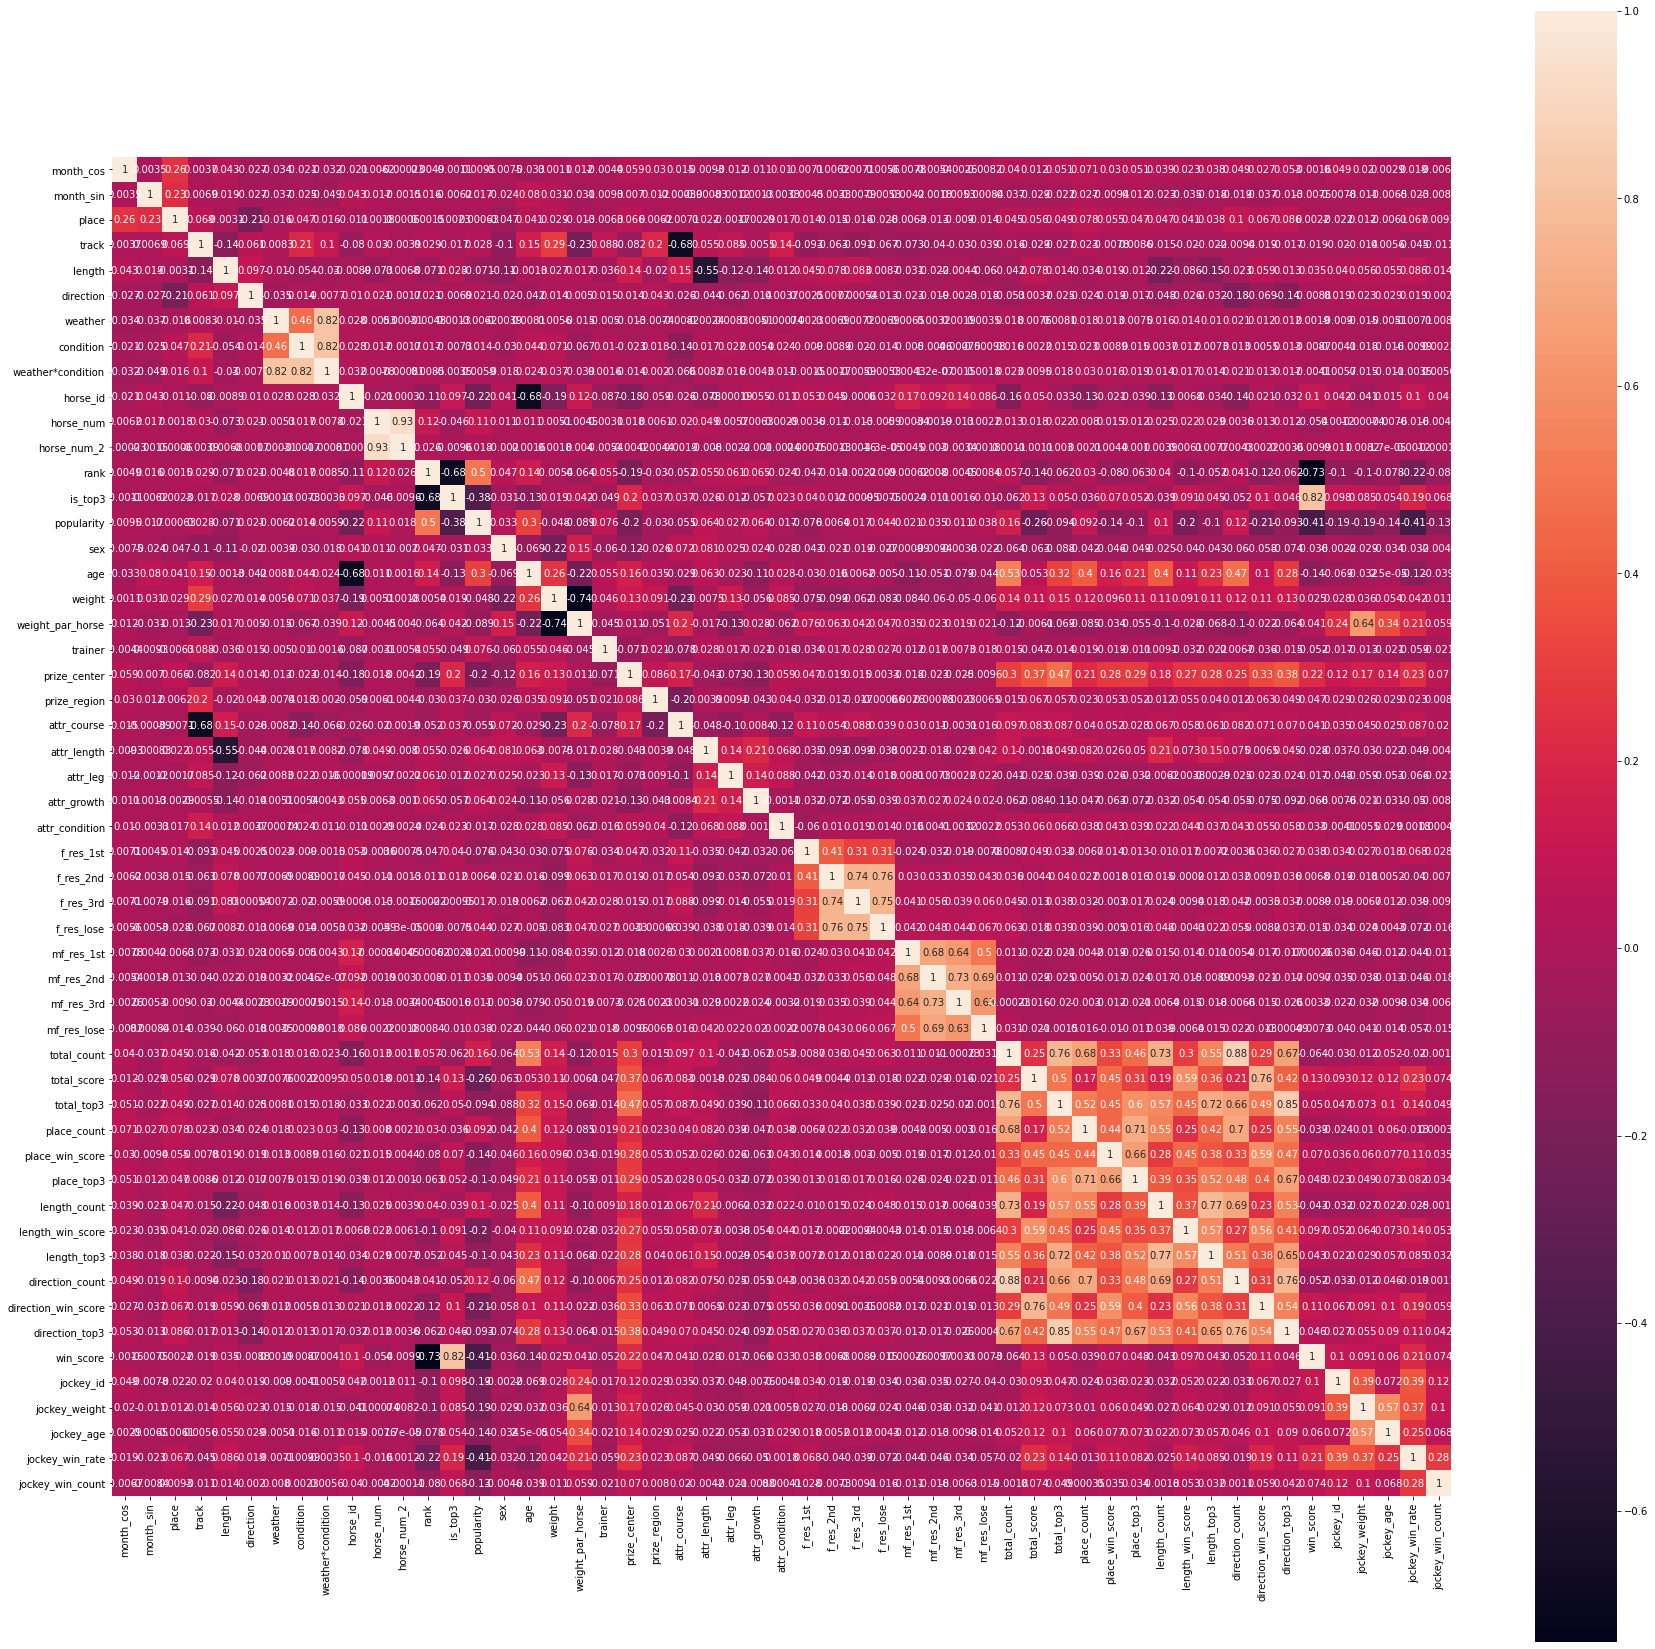

In [28]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.drop(['race_id', 'quarter', 'year', 'month'], axis=1).corr(), square=True, annot=True)